### **Keras API Task**

In [1]:
# Sequential API

In [2]:
from tensorflow.keras.datasets import mnist

mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()
print("train dataset shape: ", train_images.shape, train_targets.shape)
print("test dataset shape: ", test_images.shape, test_targets.shape)

train dataset shape:  (60000, 28, 28) (60000,)
test dataset shape:  (10000, 28, 28) (10000,)


In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

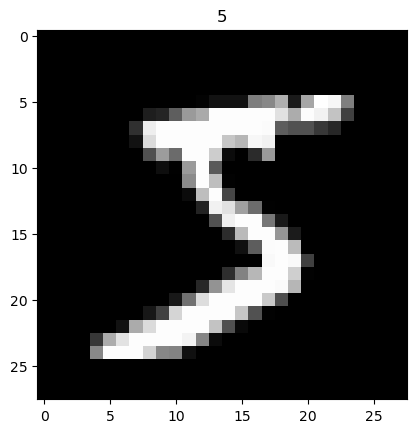

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray') #해당 이미지
plt.title(train_targets[0]) # 이름
plt.show()

In [6]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

In [7]:
train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

# 전부 Dense layer라고 부른다.
# 학습할 데이터가 많으면 neuron의 개수를 더 많이 지정(예, 64, 128, 256 등)하거나
# 은닉층 수를 더 늘리면 된다.
# 학습할 데이터가 적으면 neuron의 개수 또는 은닉층 수를 줄이는 것이 좋다.
model = Sequential([
    # 전체 28 * 28(784)개의 feature로 flatten 진행
    # 첫 번째 Input Layer
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    
    # 두 번째 Hidden Layer
    Dense(64, activation='relu'),
    
    # 세 번째 Hidden Layer
    Dense(128, activation='relu'),
    
    # 마지막 Output Layer
    Dense(10, activation='softmax')
])

# 파라미터 수 = (입력 뉴런 수 * 출력 뉴런 수) + 출력 뉴런 수
# 이 파라미터 수에는 편향(bias) 파라미터도 포함되어여
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
# 모델에 컴파일 해준다. 컴파일 할 때에는 절대 담지 말기
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [10]:
from tensorflow.keras.utils import to_categorical
# 원-핫 인코딩
train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [11]:
# 모델에 핏을 준 후에 히스토리에 담아준다
history = model.fit(x=train_images, y=train_oh_targets, batch_size=64, epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8436 - loss: 0.5499
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9577 - loss: 0.1415
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9709 - loss: 0.0980
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9761 - loss: 0.0774
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9801 - loss: 0.0624
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9850 - loss: 0.0465
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9867 - loss: 0.0397
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9887 - loss: 0.0352
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9912 - loss: 0.0275
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9934 - loss: 0.0224
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9930 - loss: 0.0214
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [12]:
# 로스값과 정확도를 출력해본다
print(history.history['loss'])

[0.3022964298725128, 0.13225695490837097, 0.09654784202575684, 0.07717931270599365, 0.06324515491724014, 0.051012035459280014, 0.04457395151257515, 0.03794300556182861, 0.031238622963428497, 0.02666589431464672, 0.023678552359342575, 0.02269682288169861, 0.01763176918029785, 0.017467107623815536, 0.014498996548354626, 0.014814394526183605, 0.012506701983511448, 0.014450625516474247, 0.008403618820011616, 0.010668708011507988]


In [13]:
print(history.history['accuracy'])

[0.9117000102996826, 0.959766685962677, 0.97038334608078, 0.9761499762535095, 0.9796000123023987, 0.9835500121116638, 0.9854833483695984, 0.9876833558082581, 0.9901999831199646, 0.9917166829109192, 0.9924166798591614, 0.9924666881561279, 0.9940833449363708, 0.9941999912261963, 0.9949666857719421, 0.9951666593551636, 0.9956166744232178, 0.9951666593551636, 0.9972166419029236, 0.9964333176612854]


In [14]:
# 테스트 데이터와 같은 차원으로 맞춰주기 위해 확장을 진행한다
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [15]:
pred_prob = model.predict(np.expand_dims(test_images[100], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[2.9380047e-07 5.3830148e-12 6.4738076e-10 9.8889206e-14 3.2404964e-07
  3.3076091e-09 9.9999642e-01 5.5149275e-12 2.9607584e-06 2.8734890e-15]]


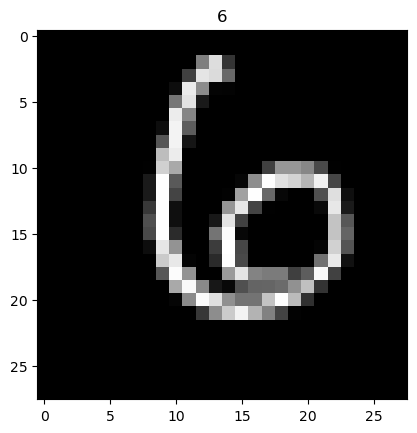

In [16]:
import matplotlib.pyplot as plt

plt.imshow(test_images[100], cmap='gray')
plt.title(pred_prob.flatten().argsort()[::-1][0])
plt.show()

In [17]:
# Validation 검증하기

In [18]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()
# shape 가 중요하니 반드시 출력해보기
# (60000, 1) 이라고 적어져있으면 1차원으로 바꿔야한다
print("train dataset shape: ", train_images.shape, train_targets.shape)
print("test dataset shape: ", test_images.shape, test_targets.shape)

train dataset shape:  (60000, 28, 28) (60000,)
test dataset shape:  (10000, 28, 28) (10000,)


In [19]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# 트레인과 벨리데이션으로 나누기
train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)
# 원핫인코딩 진행하기
train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)
# 잘 됐는지 출력해보기
print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [21]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    validation_data=(validation_images, validation_oh_targets), 
                    batch_size=32,
                    epochs=20,
                    verbose=2)

Epoch 1/20
1500/1500 - 3s - 2ms/step - acc: 0.8046 - loss: 1.5955 - val_acc: 0.8700 - val_loss: 0.5356
Epoch 2/20
1500/1500 - 2s - 1ms/step - acc: 0.8858 - loss: 0.4470 - val_acc: 0.9010 - val_loss: 0.4200
Epoch 3/20
1500/1500 - 2s - 1ms/step - acc: 0.9005 - loss: 0.3889 - val_acc: 0.9028 - val_loss: 0.4048
Epoch 4/20
1500/1500 - 2s - 1ms/step - acc: 0.9145 - loss: 0.3449 - val_acc: 0.9174 - val_loss: 0.3393
Epoch 5/20
1500/1500 - 2s - 1ms/step - acc: 0.9282 - loss: 0.2907 - val_acc: 0.9252 - val_loss: 0.3354
Epoch 6/20
1500/1500 - 2s - 1ms/step - acc: 0.9381 - loss: 0.2406 - val_acc: 0.9293 - val_loss: 0.2811
Epoch 7/20
1500/1500 - 2s - 1ms/step - acc: 0.9470 - loss: 0.2024 - val_acc: 0.9417 - val_loss: 0.2347
Epoch 8/20
1500/1500 - 2s - 2ms/step - acc: 0.9514 - loss: 0.1767 - val_acc: 0.9477 - val_loss: 0.2172
Epoch 9/20
1500/1500 - 2s - 1ms/step - acc: 0.9572 - loss: 0.1502 - val_acc: 0.9477 - val_loss: 0.2104
Epoch 10/20
1500/1500 - 2s - 1ms/step - acc: 0.9598 - loss: 0.1407 - val_

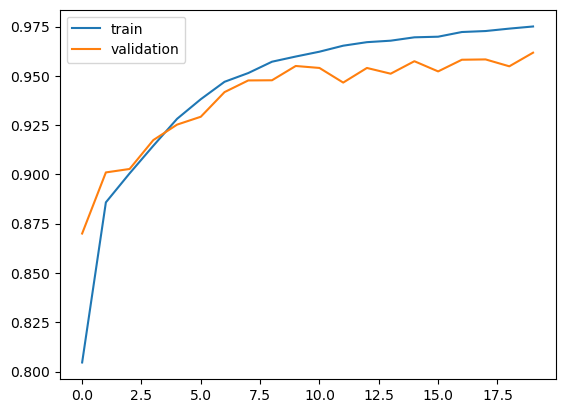

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


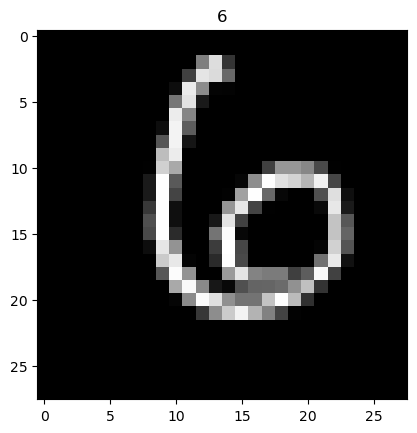

In [24]:
import matplotlib.pyplot as plt

pred_prob = model.predict(np.expand_dims(test_images[100], axis=0))

plt.imshow(test_images[100], cmap='gray')
plt.title(pred_prob.flatten().argsort()[::-1][0])
plt.show()

In [25]:
# Functional API

In [26]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

In [27]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [28]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [29]:
model = create_model()
# 어떤 구조로 되어있는지 summary 확인 > 파라미터를 어떻게 구할지도 볼 수 있다
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [31]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=15,
                    verbose=2,
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/15
750/750 - 2s - 3ms/step - acc: 0.9006 - loss: 0.3396 - val_acc: 0.9470 - val_loss: 0.1790
Epoch 2/15
750/750 - 1s - 1ms/step - acc: 0.9566 - loss: 0.1484 - val_acc: 0.9612 - val_loss: 0.1323
Epoch 3/15
750/750 - 1s - 1ms/step - acc: 0.9678 - loss: 0.1072 - val_acc: 0.9622 - val_loss: 0.1203
Epoch 4/15
750/750 - 1s - 1ms/step - acc: 0.9736 - loss: 0.0851 - val_acc: 0.9680 - val_loss: 0.1013
Epoch 5/15
750/750 - 1s - 1ms/step - acc: 0.9791 - loss: 0.0682 - val_acc: 0.9691 - val_loss: 0.0952
Epoch 6/15
750/750 - 1s - 1ms/step - acc: 0.9828 - loss: 0.0560 - val_acc: 0.9708 - val_loss: 0.0915
Epoch 7/15
750/750 - 1s - 1ms/step - acc: 0.9860 - loss: 0.0467 - val_acc: 0.9742 - val_loss: 0.0866
Epoch 8/15
750/750 - 1s - 1ms/step - acc: 0.9872 - loss: 0.0391 - val_acc: 0.9714 - val_loss: 0.0953
Epoch 9/15
750/750 - 1s - 1ms/step - acc: 0.9886 - loss: 0.0348 - val_acc: 0.9710 - val_loss: 0.0931
Epoch 10/15
750/750 - 1s - 1ms/step - acc: 0.9902 - loss: 0.0299 - val_acc: 0.9712 - val_lo

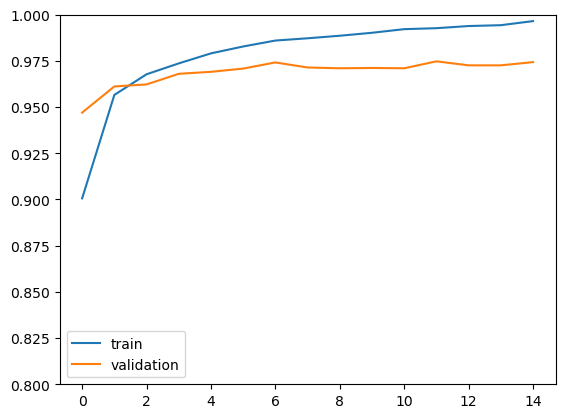

In [38]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.ylim(0.8, 1)
    plt.legend()
    plt.show()

show_history(history)

In [39]:
model.evaluate(test_images, test_oh_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - acc: 0.9697 - loss: 0.1237


[0.10113879293203354, 0.9739999771118164]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


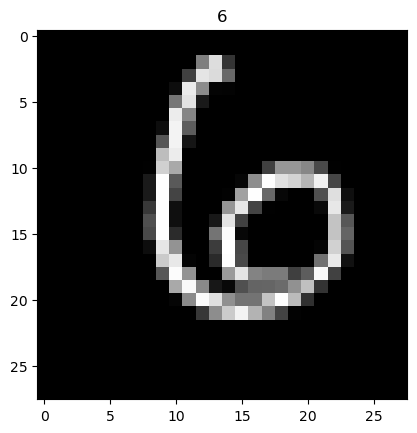

In [33]:
import matplotlib.pyplot as plt

pred_prob = model.predict(np.expand_dims(test_images[100], axis=0))

plt.imshow(test_images[100], cmap='gray')
plt.title(pred_prob.flatten().argsort()[::-1][0])
plt.show()